**Problem Statement**

The automotive industry constantly needs accurate predictions and insights to enhance business decisions. This project aims to develop a predictive model that estimates the resale value of vehicles based on various features such as age, mileage, and horsepower. Understanding these factors' influence on pricing can help stakeholders make informed decisions about buying, selling, and maintaining inventory. The project explores comprehensive data exploration, rigorous outlier detection, and advanced modeling techniques to achieve a reliable model that stakeholders can use to predict prices effectively and manage their assets more efficiently.

**Data exploration**

In [29]:
import pandas as pd

resale_df=pd.read_csv('ToyotaCorolla.csv')
resale_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [30]:
resale_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [31]:
descriptive_stats = resale_df.describe()
descriptive_stats

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.002786,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.052723,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
missing_values = resale_df.isnull().sum()
missing_values

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

The dataset is free of any missing values

**Visualizations**

C:\Users\prabh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\prabh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



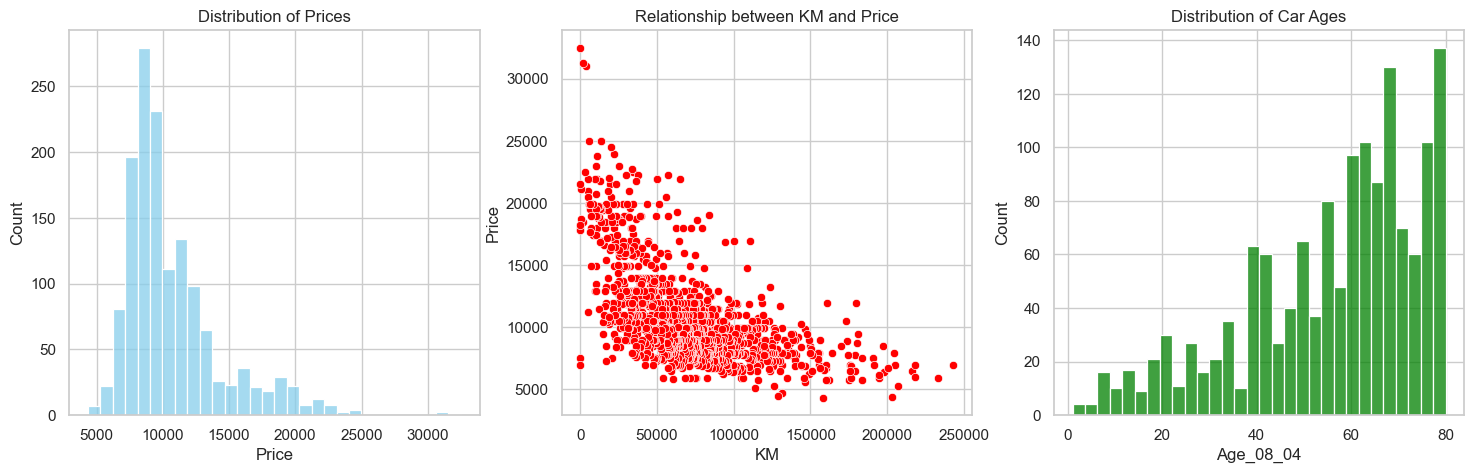

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Histogram of Price
sns.histplot(resale_df['Price'], bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Prices')

# Scatter plot of KM vs Price
sns.scatterplot(x='KM', y='Price', data=resale_df, ax=axes[1], color='red')
axes[1].set_title('Relationship between KM and Price')

# Histogram of Age
sns.histplot(resale_df['Age_08_04'], bins=30, ax=axes[2], color='green')
axes[2].set_title('Distribution of Car Ages')

plt.show()

In [34]:
import plotly.express as px

boxplot = px.box(resale_df, x='Fuel_Type', y='Price', color='Fuel_Type',
                 title="Price Distribution Across Different Fuel Types")
boxplot.show()

In [35]:
import plotly.graph_objects as go

features = ['Price', 'Age_08_04', 'KM', 'HP', 'Weight']

correlation_matrix = resale_df[features].corr()

heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='YlOrRd',
                   hoverongaps = False))

heatmap.update_layout(title='Correlation Heatmap of Selected Features',
                      xaxis_title='Feature',
                      yaxis_title='Feature')
heatmap.show()

In [36]:
import dash
from dash import html, dcc, Input, Output
import plotly.express as px

df = resale_df

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Interactive Car Price Distribution"),
    dcc.Dropdown(
        id='fuel-type-dropdown',
        options=[{'label': i, 'value': i} for i in df['Fuel_Type'].unique()],
        value='Petrol'
    ),
    dcc.Graph(id='price-distribution-graph')
])

@app.callback(
    Output('price-distribution-graph', 'figure'),
    [Input('fuel-type-dropdown', 'value')]
)
def update_graph(selected_fuel_type):
    filtered_df = df[df['Fuel_Type'] == selected_fuel_type]
    fig = px.histogram(filtered_df, x='Price', nbins=30, title="Price Distribution by Fuel Type")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

In [37]:
import dash
from dash import html, dcc, Input, Output
import plotly.express as px
import pandas as pd

df = resale_df  

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Car Features Comparison Dashboard"),
    
    html.Div([
        dcc.Dropdown(
            id='xaxis-column',
            options=[{'label': col, 'value': col} for col in df.columns if df[col].dtype in ['int64', 'float64']],
            value='Age_08_04',
            style={'width': '48%', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='yaxis-column',
            options=[{'label': col, 'value': col} for col in df.columns if df[col].dtype in ['int64', 'float64']],
            value='Price',
            style={'width': '48%', 'display': 'inline-block'}
        )
    ]),
    
    html.Div([
        dcc.Dropdown(
            id='fuel-type-filter',
            options=[{'label': i, 'value': i} for i in df['Fuel_Type'].unique()],
            value='Petrol',
            style={'width': '48%', 'display': 'inline-block'}
        ),
        dcc.Dropdown(
            id='doors-filter',
            options=[{'label': i, 'value': i} for i in df['Doors'].unique()],
            value=4,
            style={'width': '48%', 'display': 'inline-block'}
        )
    ]),

    dcc.Graph(id='feature-comparison-graph')
])

@app.callback(
    Output('feature-comparison-graph', 'figure'),
    [Input('xaxis-column', 'value'),
     Input('yaxis-column', 'value'),
     Input('fuel-type-filter', 'value'),
     Input('doors-filter', 'value')]
)
def update_graph(xaxis_column_name, yaxis_column_name, selected_fuel_type, selected_doors):
    filtered_df = df[(df['Fuel_Type'] == selected_fuel_type) & (df['Doors'] == selected_doors)]
    fig = px.scatter(filtered_df, x=xaxis_column_name, y=yaxis_column_name, hover_data=[xaxis_column_name, yaxis_column_name])
    fig.update_layout(transition_duration=500)
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)

**Data Processing**

In [38]:
#Features that we are using for the prediction
current_year = 2024
current_month = 4
resale_df['Age_in_months'] = (current_year - resale_df['Mfg_Year']) * 12 + (current_month - resale_df['Mfg_Month'])
features = ['Price', 'Age_in_months', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Quarterly_Tax', 'Weight']
resale_selected_df = resale_df[features]
resale_df[features]

,Price,Age_in_months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
0,13500,258,46986,Diesel,90,1,0,2000,3,210,1165
1,13750,258,72937,Diesel,90,1,0,2000,3,210,1165
2,13950,259,41711,Diesel,90,1,0,2000,3,210,1165
3,14950,261,48000,Diesel,90,0,0,2000,3,210,1165
4,13750,265,38500,Diesel,90,0,0,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,304,20544,Petrol,86,1,0,1300,3,69,1025
1432,10845,307,19000,Petrol,86,0,0,1300,3,69,1015
1433,8500,306,17016,Petrol,86,0,0,1300,3,69,1015
1434,7250,305,16916,Petrol,86,1,0,1300,3,69,1015


In [39]:
#Converting categorical data into dummy variables
resale_prepared_df = pd.get_dummies(resale_selected_df, drop_first=True)
resale_prepared_df.head(), resale_prepared_df.shape

(   Price  Age_in_months     KM  HP  Met_Color  Automatic    CC  Doors  \
 0  13500            258  46986  90          1          0  2000      3   
 1  13750            258  72937  90          1          0  2000      3   
 2  13950            259  41711  90          1          0  2000      3   
 3  14950            261  48000  90          0          0  2000      3   
 4  13750            265  38500  90          0          0  2000      3   
 
    Quarterly_Tax  Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
 0            210    1165              True             False  
 1            210    1165              True             False  
 2            210    1165              True             False  
 3            210    1165              True             False  
 4            210    1170              True             False  ,
 (1436, 12))

In [40]:
statistical_summary = resale_prepared_df.describe()
# Focusing on 'Price', 'Age', 'KM' (mileage), and 'HP' (Horse Power) as they are likely to affect the resale value
relevant_columns = ['Price', 'Age_in_months', 'KM', 'HP']

Q1 = resale_prepared_df[relevant_columns].quantile(0.25)
Q3 = resale_prepared_df[relevant_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((resale_prepared_df[relevant_columns] < (Q1 - 1.5 * IQR)) | 
            (resale_prepared_df[relevant_columns] > (Q3 + 1.5 * IQR))).sum()
statistical_summary, outliers

(              Price  Age_in_months             KM           HP    Met_Color  \
 count   1436.000000    1436.000000    1436.000000  1436.000000  1436.000000   
 mean   10730.824513     290.947075   68533.259749   101.502089     0.674791   
 std     3626.964585      18.599988   37506.448872    14.981080     0.468616   
 min     4350.000000     236.000000       1.000000    69.000000     0.000000   
 25%     8450.000000     279.000000   43000.000000    90.000000     0.000000   
 50%     9900.000000     296.000000   63389.500000   110.000000     1.000000   
 75%    11950.000000     305.000000   87020.750000   110.000000     1.000000   
 max    32500.000000     315.000000  243000.000000   192.000000     1.000000   
 
          Automatic           CC        Doors  Quarterly_Tax      Weight  
 count  1436.000000   1436.00000  1436.000000    1436.000000  1436.00000  
 mean      0.055710   1576.85585     4.033426      87.122563  1072.45961  
 std       0.229441    424.38677     0.952677      41

We conducted a preliminary analysis of the numerical features in the dataset to identify potential outliers. We calculated the descriptive statistics, including mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum values, for the features 'Price', 'Age_in_months', 'KM' (mileage), and 'HP' (Horse Power). Next, we calculated the Interquartile Range (IQR) for each of these features, which is the range between the first and third quartiles (Q1 and Q3), to determine the spread of the middle 50% of the data. Using the IQR, we identified potential outliers as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR for each feature. The count of outliers for each feature was computed and presented alongside the descriptive statistics. This analysis helps in understanding the distribution of the numerical features and detecting any extreme values that may require further investigation or treatment.

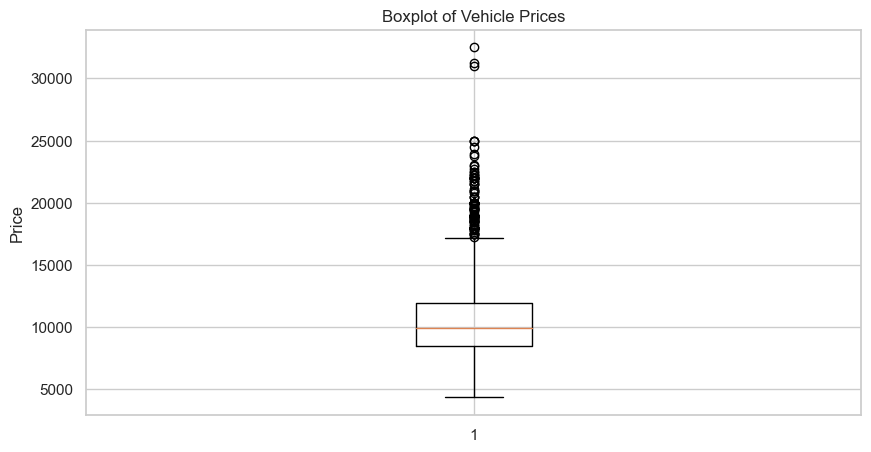

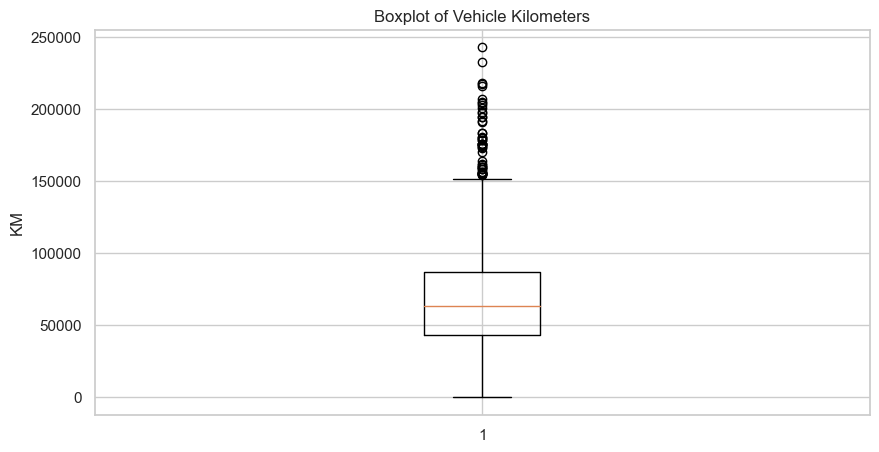

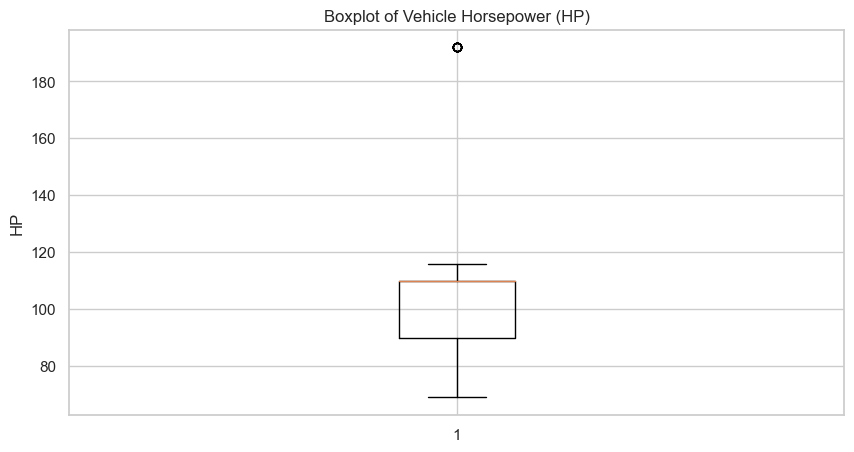

In [41]:
import matplotlib.pyplot as plt

# Price Boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(resale_prepared_df['Price'])
plt.title('Boxplot of Vehicle Prices')
plt.ylabel('Price')
plt.show()

# KM Boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(resale_prepared_df['KM'])
plt.title('Boxplot of Vehicle Kilometers')
plt.ylabel('KM')
plt.show()

# HP Boxplot
plt.figure(figsize=(10, 5))
plt.boxplot(resale_prepared_df['HP'])
plt.title('Boxplot of Vehicle Horsepower (HP)')
plt.ylabel('HP')
plt.show()

Here, we created boxplots to visually inspect potential outliers for the numerical features 'Price', 'KM' (kilometers), and 'HP' (horsepower) in the dataset resale_prepared_df. Boxplots are effective tools for identifying outliers as they display the distribution of data, including outliers, quartiles, and the median. By plotting these boxplots, we aimed to gain insights into the distribution of these variables and identify any extreme values that may indicate outliers. This visual analysis complements the earlier statistical summary and provides a clearer understanding of the data distribution, aiding in the detection of potential outliers.

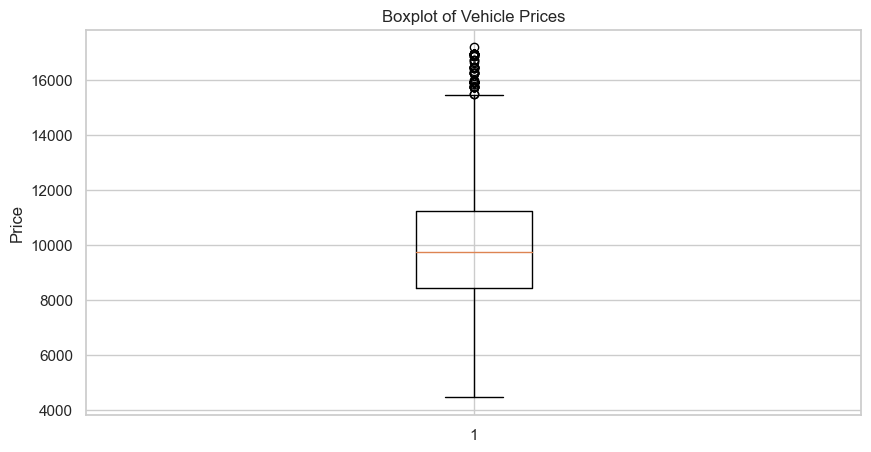

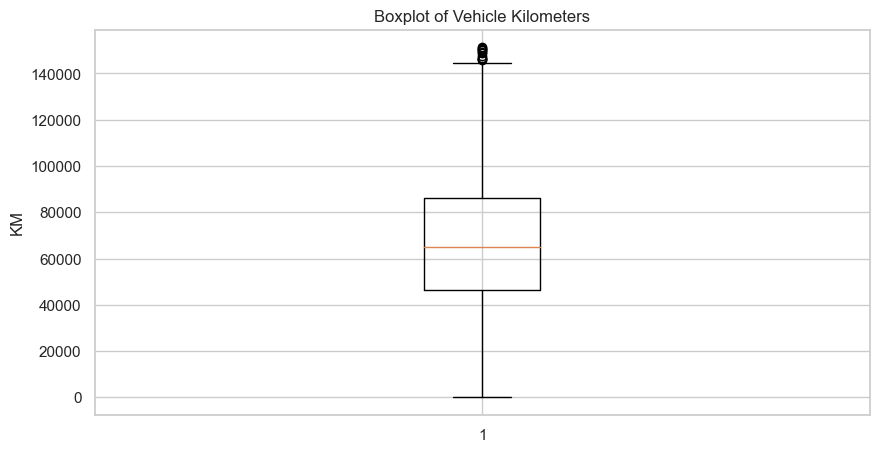

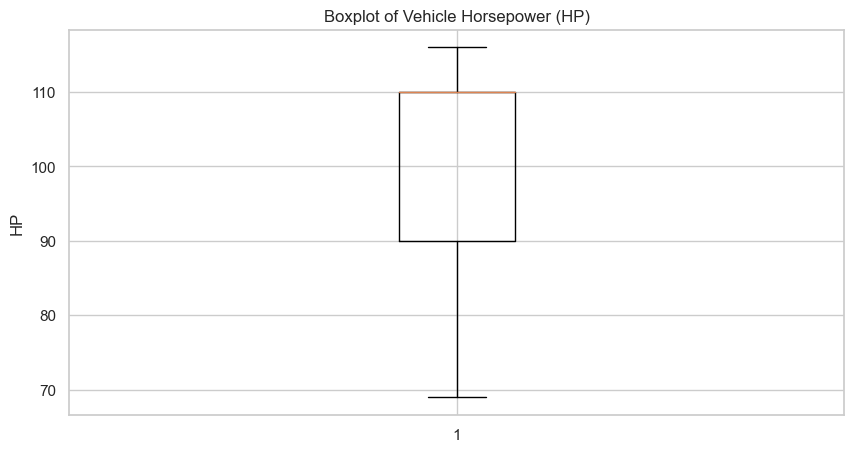

In [42]:
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data.index[(data < lower_bound) | (data > upper_bound)].tolist()

outlier_indices_price = find_outliers_iqr(resale_prepared_df['Price'])
outlier_indices_km = find_outliers_iqr(resale_prepared_df['KM'])
outlier_indices_hp = find_outliers_iqr(resale_prepared_df['HP'])

all_outlier_indices = set(outlier_indices_price) | set(outlier_indices_km) | set(outlier_indices_hp)

df_filtered = resale_prepared_df.drop(index=all_outlier_indices)

df_filtered.shape

plt.figure(figsize=(10, 5))
plt.boxplot(df_filtered['Price'])
plt.title('Boxplot of Vehicle Prices')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(df_filtered['KM'])
plt.title('Boxplot of Vehicle Kilometers')
plt.ylabel('KM')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(df_filtered['HP'])
plt.title('Boxplot of Vehicle Horsepower (HP)')
plt.ylabel('HP')
plt.show()

We defined a function find_outliers_iqr() to identify outlier indices based on the Interquartile Range (IQR) for a given DataFrame column. We then used this function to find outliers for the numerical features 'Price', 'KM', and 'HP' in the resale_prepared_df DataFrame. Next, we combined all outlier indices across these features and removed the corresponding rows from the DataFrame to create a filtered DataFrame df_filtered. Finally, we generated boxplots for 'Price', 'KM', and 'HP' in the filtered DataFrame to visually inspect the distribution of these variables after removing outliers. This approach allows us to handle outliers more systematically by using the IQR method and provides a clearer representation of the data distribution without the influence of extreme values.

**Model Exploration and Selection**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


categorical_cols = resale_df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

resale_df_encoded = pd.get_dummies(resale_df, columns=categorical_cols)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = resale_df_encoded.drop('Price', axis=1)
y = resale_df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin_scaled = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression MSE with encoded data:", mse_lin)
print("Linear Regression MAE with scaled data:", mae_lin_scaled)
print("R-squared for Linear Regression:", r2_lin)

Categorical columns: Index(['Model', 'Fuel_Type', 'Color'], dtype='object')
Linear Regression MSE with encoded data: 24826230146729.406
Linear Regression MAE with scaled data: 1102136.6364203559
R-squared for Linear Regression: -1860646.7579421627


In [44]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_ridge = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest MAE:", mae_ridge)
print("R-squared for Random Forest:", r2_rf)

Random Forest MSE: 937228.8960281251
Random Forest MAE: 738.5631597222223
R-squared for Random Forest: 0.929757646095814


In [45]:
# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting MSE:", mse_gb)
print("Gradient Boosting MAE:", mae_gb)
print("R-squared for Gradient Boosting:", r2_gb)

Gradient Boosting MSE: 903402.4027589274
Gradient Boosting MAE: 721.8365991168505
R-squared for Gradient Boosting: 0.9322928352279695


In [46]:
rmse_gb = np.sqrt(mse_gb)
print("Gradient Boosting RMSE:", rmse_gb)

Gradient Boosting RMSE: 950.4748301553952


Both Random Forest and Gradient Boosting models perform well, but the Gradient Boosting model edges out slightly better across all three key metrics: it has a lower MSE and MAE, and a slightly higher R-squared value. The higher R-squared value close to 1 indicates that the model explains a very high proportion of the variance in the dataset, which is desirable.

Therefore, The Gradient Boosting Regressor would be the best choice among the three models.

In [47]:
average_price = df_filtered['Price'].mean()
print(f"Average Reselling Price : {average_price}")

efficiency_percentage = r2_gb * 100
print(f"Prediction Efficiency in %: {efficiency_percentage}")

Average Reselling Price : 10047.586530931872
Prediction Efficiency in %: 93.22928352279695


**Model Performance Evaluation**

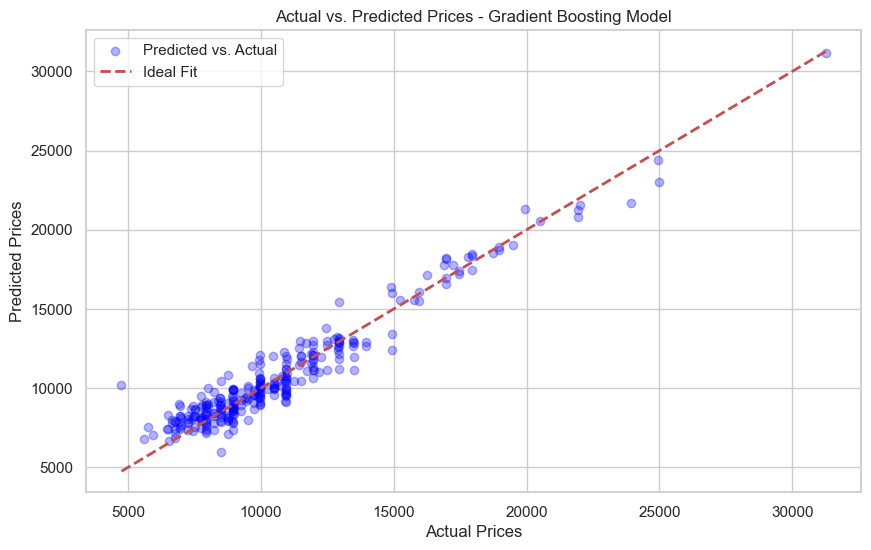

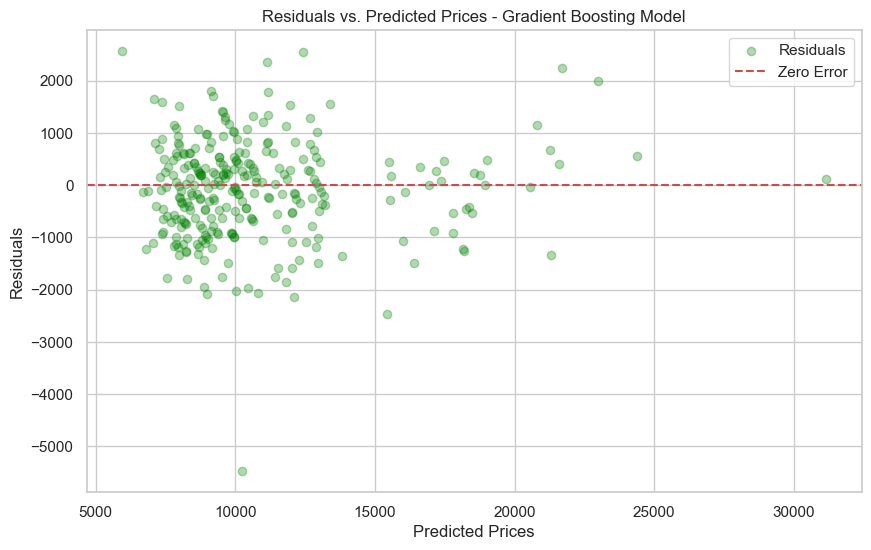

In [48]:
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted values for Gradient Boosting Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.3, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - Gradient Boosting Model')
plt.legend()
plt.show()

# Plotting residuals for the Gradient Boosting Model
residuals_gb = y_test - y_pred_gb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb, residuals_gb, alpha=0.3, color='green', label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices - Gradient Boosting Model')
plt.legend()
plt.show()

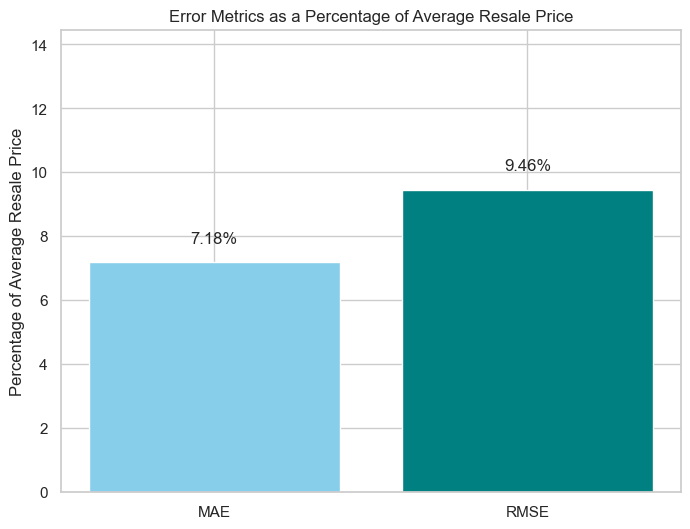

In [49]:
import matplotlib.pyplot as plt

average_resale_price = 10047.59
mae = 721.83
rmse = 950.47

mae_percentage = (mae / average_resale_price) * 100
rmse_percentage = (rmse / average_resale_price) * 100

labels = ['MAE', 'RMSE']
percentages = [mae_percentage, rmse_percentage]

plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['skyblue', 'teal'])

for i, v in enumerate(percentages):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', va='bottom')

plt.ylabel('Percentage of Average Resale Price')
plt.title('Error Metrics as a Percentage of Average Resale Price')
plt.ylim(0, max(percentages) + 5)

plt.show()

In the business contexts, a prediction error margin of less than 10% is quite good, especially if prices vary significantly. In this case, in the used car market, where prices can vary widely based on the factors such as make, model, year, condition, and mileage, an average prediction error of about 7-10% is acceptable.

# Resale Time-Series Analysis Of A Sample Car Type Petrol

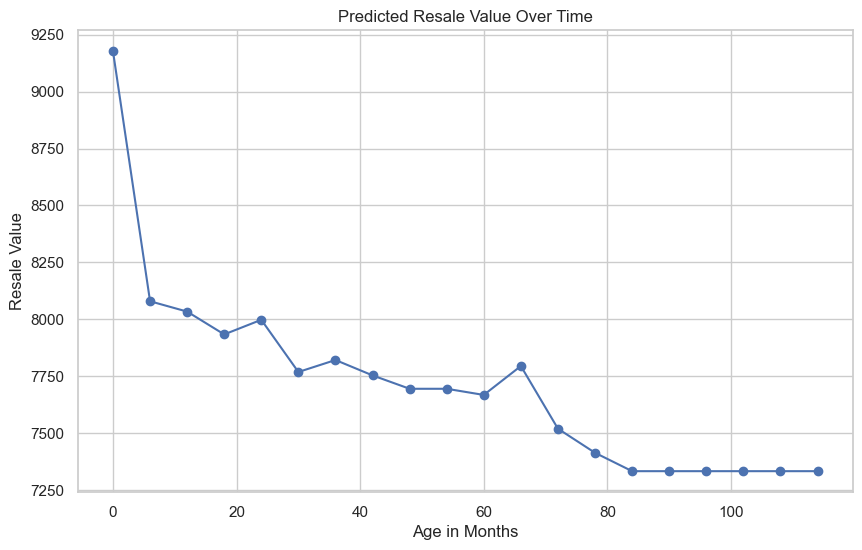

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


X = df_filtered.drop('Price', axis=1)
y = df_filtered['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

pipeline.fit(X_train, y_train)

sample_vehicle = X_train.median().to_dict()

sample_vehicle['Fuel_Type_Diesel'] = 0
sample_vehicle['Fuel_Type_Petrol'] = 1  

time_periods = np.arange(0, 120, 6) 
predicted_prices = []

for months in time_periods:
    sample_vehicle['Age_in_months'] += 6
    sample_vehicle['KM'] += 6 * 1000

    simulation_df = pd.DataFrame([sample_vehicle], columns=X_train.columns)

    predicted_price = pipeline.predict(simulation_df)[0]
    predicted_prices.append(predicted_price)

plt.figure(figsize=(10, 6))
plt.plot(time_periods, predicted_prices, marker='o')
plt.title('Predicted Resale Value Over Time')
plt.xlabel('Age in Months')
plt.ylabel('Resale Value')
plt.grid(True)
plt.show()